In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [200]:
# Loading the data
tt_iterative = pd.read_csv("data/tt_iterative.csv").rename(columns={"Unnamed: 0": "id"}).set_index("id")
tt_knn = pd.read_csv("data/tt_knn.csv").rename(columns={"Unnamed: 0": "id"}).set_index("id")
tt_mean= pd.read_csv("data/tt_mean.csv").rename(columns={"Unnamed: 0": "id"}).set_index("id")

In [201]:
train_iterative = tt_iterative.iloc[:40000] 
train_knn = tt_knn.iloc[:40000] 
train_mean = tt_mean.iloc[:40000] 

In [202]:
test_iterative = tt_iterative.iloc[40000:] 
test_knn = tt_knn.iloc[40000:] 
test_mean = tt_mean.iloc[40000:] 

# Exploratory Data Analysis

First plot of the data, to give me an idea how it is distributed

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

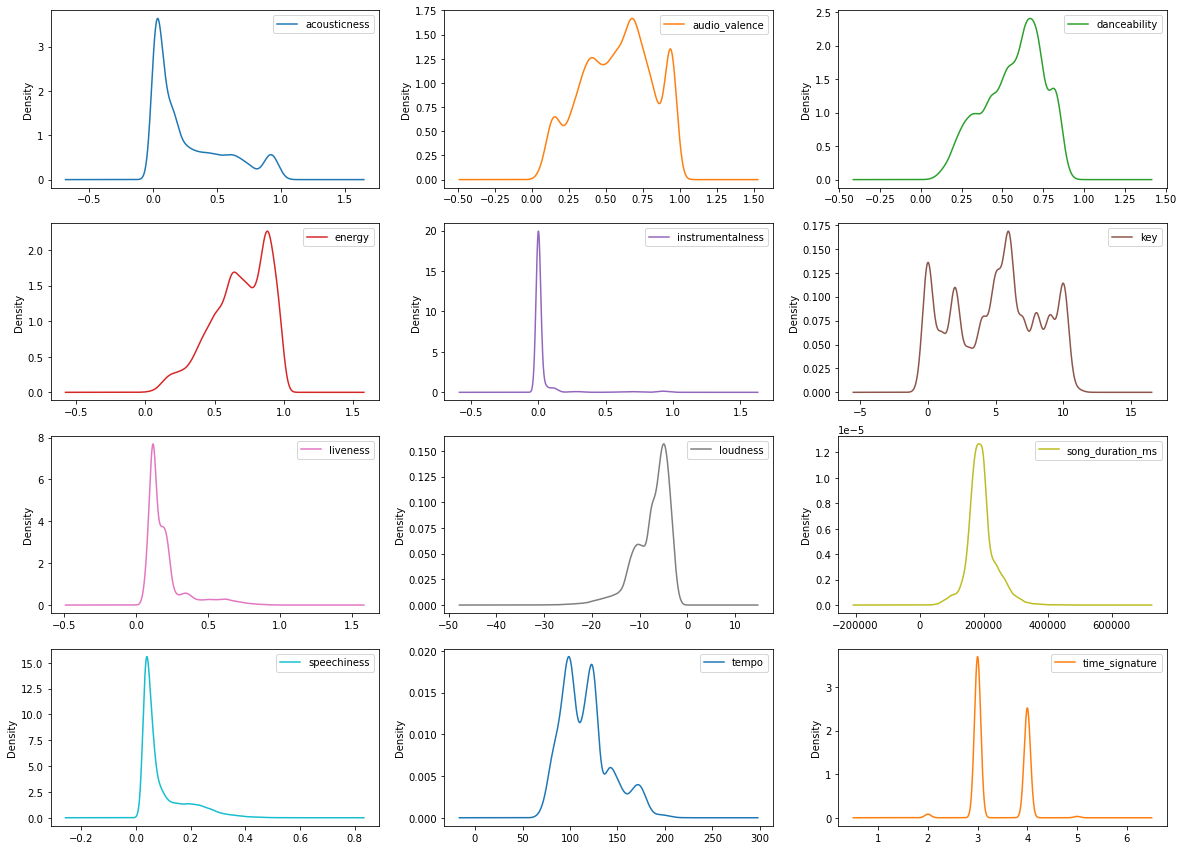

In [203]:
(train_iterative[train_iterative.columns.difference(["audio_mode", "song_popularity"])]
.plot(kind="density", subplots=True, layout=(4,3), figsize=(20,15), sharex=False))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

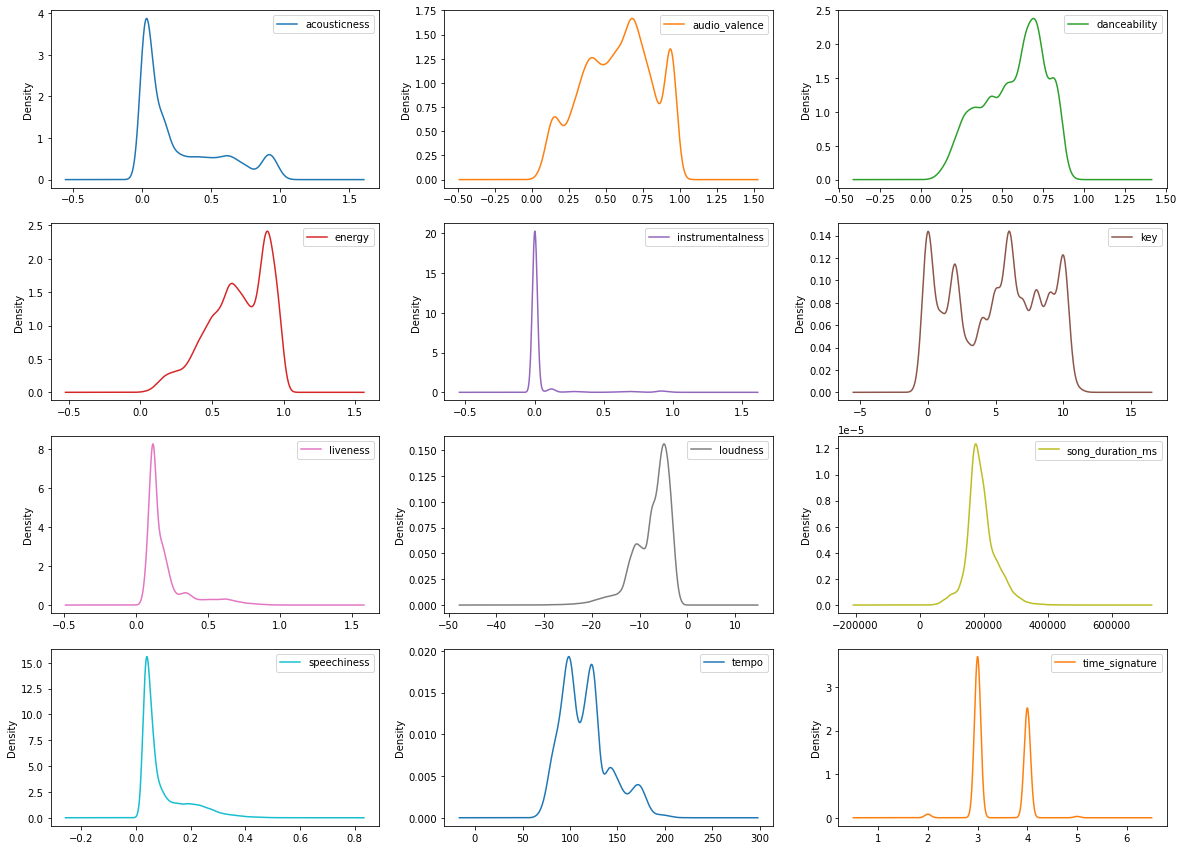

In [204]:
(train_knn[train_knn.columns.difference(["audio_mode", "song_popularity"])]
.plot(kind="density", subplots=True, layout=(4,3), figsize=(20,15), sharex=False))

In [205]:
# (train_mean[train_mean.columns.difference(["audio_mode", "song_popularity"])]
# .plot(kind="density", subplots=True, layout=(4,3), figsize=(20,15), sharex=False))

Some things to note:
- _time signature_ is categorical
- _key_ is also categorical
- _instrumentalness_ and _speechiness is very skewed

__Handling categorical visualizations__

<AxesSubplot:title={'center':'Time signature'}>

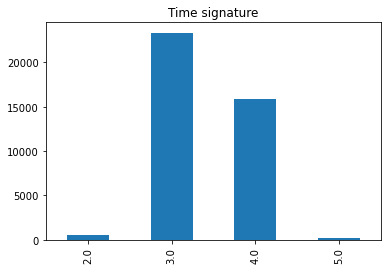

In [206]:
(train_iterative["time_signature"]
.value_counts()
.sort_index()
.plot(kind="bar", title="Time signature"))

<AxesSubplot:title={'center':'Key'}>

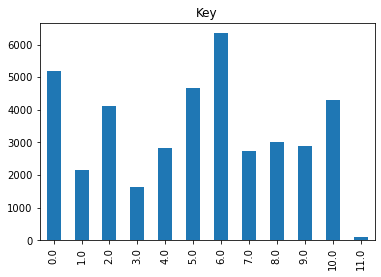

In [207]:
(train_iterative["key"]
.round(decimals=0)
.value_counts()
.sort_index()
.plot(kind="bar", title="Key"))

__Skewed visualizations__

<AxesSubplot:title={'center':'values ^82'}, ylabel='Density'>

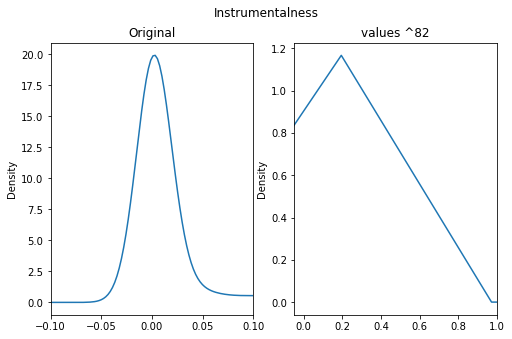

In [208]:
fig, axs = plt.subplots(1, 2, figsize=(8,5))
fig.suptitle("Instrumentalness")

train_iterative["instrumentalness"] \
    .plot(kind="density", ax=axs[0], xlim=[-0.1, 0.1], title="Original")

train_iterative["instrumentalness"] \
    .apply(lambda x: x**82).plot(kind="density", ax=axs[1], xlim=[-0.05, 1], title="values ^82")

<AxesSubplot:title={'center':'values *11'}, ylabel='Density'>

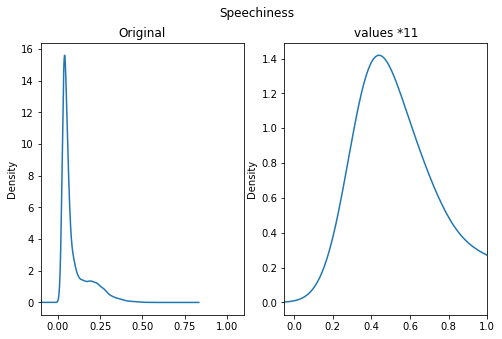

In [209]:
fig, axs = plt.subplots(1, 2, figsize=(8,5))
fig.suptitle("Speechiness")

train_iterative["speechiness"] \
    .plot(kind="density", ax=axs[0], xlim=[-0.1, 1.1], title="Original")

train_iterative["speechiness"] \
    .apply(lambda x: x*11).plot(kind="density", ax=axs[1], xlim=[-0.05, 1], title="values *11")

<AxesSubplot:title={'center':'values *3.5'}, ylabel='Density'>

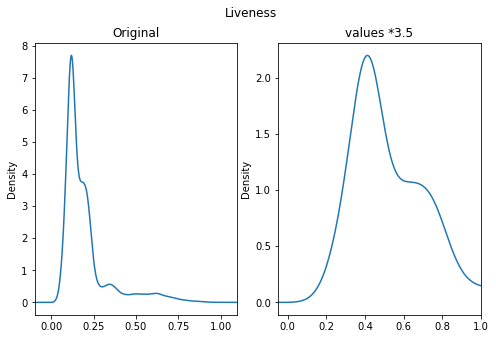

In [210]:
fig, axs = plt.subplots(1, 2, figsize=(8,5))
fig.suptitle("Liveness")

train_iterative["liveness"] \
    .plot(kind="density", ax=axs[0], xlim=[-0.1, 1.1], title="Original")

train_iterative["liveness"] \
    .apply(lambda x: x*3.5).plot(kind="density", ax=axs[1], xlim=[-0.05, 1], title="values *3.5")

__Normalizing__

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

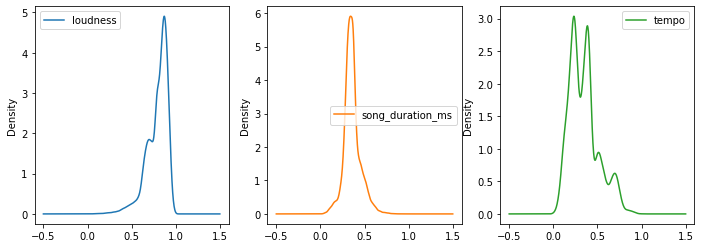

In [211]:
to_normalize = ["loudness", "song_duration_ms", "tempo"]
sub_df = train_iterative[to_normalize]
normalized_df=(sub_df-sub_df.min())/(sub_df.max()-sub_df.min())
normalized_df.plot(kind="density", subplots=True, layout=(1,4), figsize=(16,4))

<AxesSubplot:title={'center':'Loudness, values ^3'}, ylabel='Density'>

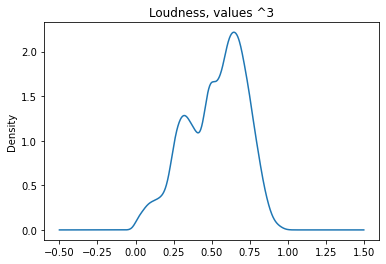

In [212]:
normalized_df["loudness"].apply(lambda x: x**3).plot(kind="density", title="Loudness, values ^3")

### Recalling all the operations and explorations

In [ ]:
train_iterative = tt_iterative.iloc[:40000] 
to_normalize = ["instrumentalness","loudness", "song_duration_ms", "tempo", "time_signature", "key", "liveness", "speechiness"]
def processing_final_dataset(original_df):
    df = original_df.copy()
    df["instrumentalness"] = df["instrumentalness"].apply(lambda x: x*15)
    df["speechiness"] = df["speechiness"].apply(lambda x: x*11)
    df["liveness"] = df["liveness"].apply(lambda x: x*4)
    df["loudness"] = df["loudness"].apply(lambda x: x**3)
    df[to_normalize] = df[to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    # df[to_normalize] = df[to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    return df
train_iterative2 = processing_final_dataset(train_iterative)

In [248]:
train_iterative = tt_iterative.iloc[:40000] 
to_normalize = ["instrumentalness","loudness", "song_duration_ms", "tempo", "time_signature", "key", "liveness", "speechiness"]
def processing_final_dataset(original_df):
    df = original_df.copy()
    df[to_normalize] = df[to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    df["instrumentalness"] = df["instrumentalness"].apply(lambda x: x*15)
    df["speechiness"] = df["speechiness"].apply(lambda x: x*11)
    df["liveness"] = df["liveness"].apply(lambda x: x*4)
    df["loudness"] = df["loudness"].apply(lambda x: x**3)
    df = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    # df[["instrumentalness", "speechiness", "liveness"]] = df[["instrumentalness", "speechiness", "liveness"]].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    return df
train_iterative2 = processing_final_dataset(train_iterative)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

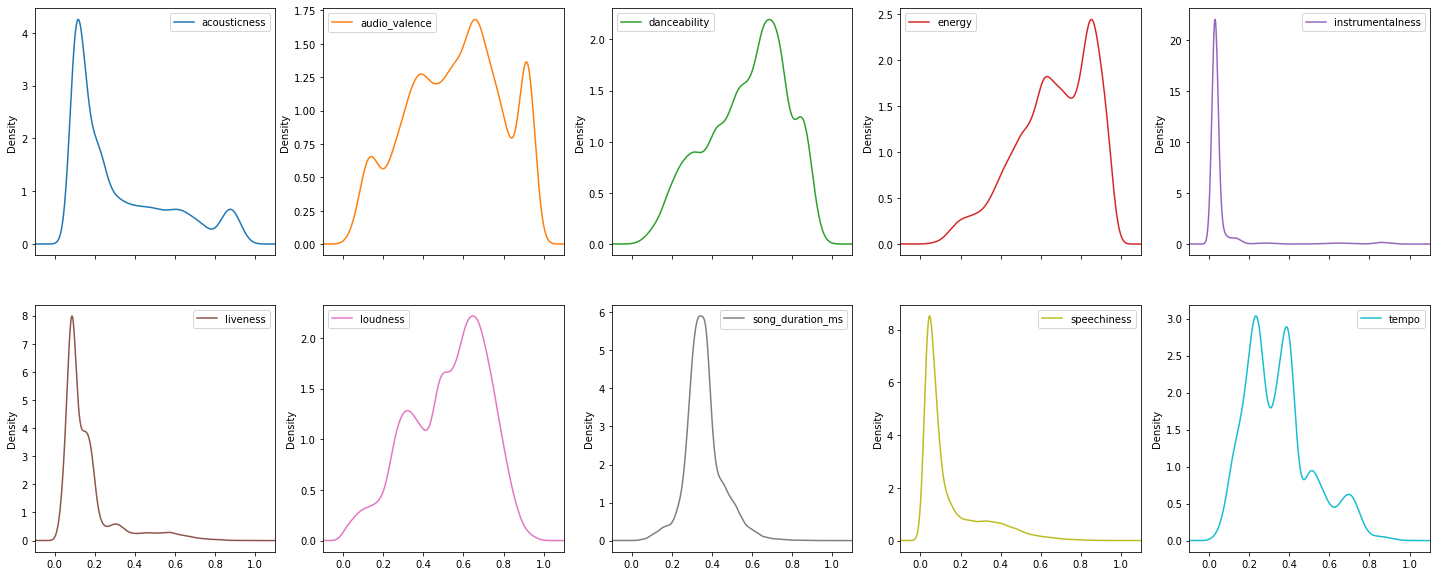

In [249]:
(train_iterative2[train_iterative2.columns.difference(["audio_mode", "key", "time_signature"])]
.plot(kind="density", subplots=True, layout=(2,5), figsize=(25,10), xlim=[-0.1, 1.1], sharex=True))

In [215]:

corr = train_iterative2.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
corr.style.background_gradient(cmap="coolwarm").highlight_null(null_color='#f1f1f1')

/home/elizarraras/anaconda3/envs/global/lib/python3.8/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/elizarraras/anaconda3/envs/global/lib/python3.8/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_duration_ms,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
acousticness,-0.181783,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
danceability,-0.067490,-0.099801,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
energy,0.162574,-0.603430,0.105094,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
instrumentalness,-0.024500,0.098733,-0.193168,-0.153664,nan,nan,nan,nan,nan,nan,nan,nan,nan
key,0.021066,-0.201953,0.132028,0.224800,-0.072320,nan,nan,nan,nan,nan,nan,nan,nan
liveness,0.036623,-0.134975,0.049382,0.166650,-0.049056,0.085894,nan,nan,nan,nan,nan,nan,nan
loudness,0.151416,-0.556151,0.179270,0.690453,-0.216947,0.221420,0.162393,nan,nan,nan,nan,nan,nan
audio_mode,-0.018635,0.069466,0.030502,-0.097830,-0.002531,-0.038030,-0.014359,-0.087495,nan,nan,nan,nan,nan
speechiness,-0.000603,-0.133747,0.186171,0.121187,-0.074049,0.108473,0.080529,0.155425,0.019790,nan,nan,nan,nan


We can observe our values are better distributed than before, so, lets import the new data for the models.

In [250]:
tt_iterative_processed = processing_final_dataset(tt_iterative)
tt_knn_processed = processing_final_dataset(tt_knn)
tt_mean_processed = processing_final_dataset(tt_mean)

In [253]:
tt_iterative_processed.min()


song_duration_ms    0.0
acousticness        0.0
danceability        0.0
energy              0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
audio_mode          0.0
speechiness         0.0
tempo               0.0
time_signature      0.0
audio_valence       0.0
dtype: float64

In [252]:

tt_iterative_processed.to_csv("data/data_to_models/tt_ite.csv")
tt_knn_processed.to_csv("data/data_to_models/tt_knn.csv")
tt_mean_processed.to_csv("data/data_to_models/tt_mean.csv")